In [1]:
import icarogw
import os
import bilby
import corner
import pickle
import h5py
import matplotlib.pyplot as plt
import numpy as np
from icarogw.posterior_samples import posterior_samples
from icarogw.analyses.cosmo_pop_rate_marginalized import hierarchical_analysis2
from icarogw.utils.quick_init import initialize_prior_dict2
from icarogw.injections import injections_at_detector2
import psutil

npool = psutil.cpu_count() - 1

injections0 = pickle.load(open(
    "/home/czc/projects/working/LIGO_posterior/O1_O2_O3_det_frame_SNR9.inj", "rb"))

injections = injections_at_detector2(injections0)


In [2]:
posterior_dict = pickle.load(open("events.pkl", "rb"))
    
print(f"Using {len(posterior_dict)} events.")

Using 69 events.


In [3]:
population_model = "PBH-bpower-1st"
cosmology_model = 'flatLCDM'
outdir = f'./results/H0_GWTC-3_{population_model}_{cosmology_model}_final/'
injections.update_cut(snr_cut=9, ifar_cut=0) 

Selecting injections with SNR 9.000000 and IFAR 0.000000 yr


In [4]:
# Setup the priors here. We are going to sample on just H0 and the maximum BH mass for a powerlaw model, just to speed up the code and fixing all the parameters
from bilby.core.prior import Uniform
prior_dict = initialize_prior_dict2(population_model, cosmology_model)

prior_dict['H0'] = 67.4
prior_dict['Om0'] = 0.315

prior_dict['ms'] = Uniform(5.0, 50.0, name='$m_*$')
prior_dict['α1'] = Uniform(0, 3.0, name='$\\alpha_1$')
prior_dict['α2'] = Uniform(1.0, 10.0, name='$\\alpha_2$')
# prior_dict['log_fpbh'] = Uniform(-3.0, 0.0, name='$\\log_{10}fpbh$')

prior_dict


{'ms': Uniform(minimum=5.0, maximum=50.0, name='$m_*$', latex_label='$m_*$', unit=None, boundary=None),
 'α1': Uniform(minimum=0, maximum=3.0, name='$\\alpha_1$', latex_label='$\\alpha_1$', unit=None, boundary=None),
 'α2': Uniform(minimum=1.0, maximum=10.0, name='$\\alpha_2$', latex_label='$\\alpha_2$', unit=None, boundary=None),
 'log_fpbh': Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None),
 'H0': 67.4,
 'Om0': 0.315}

10:45 bilby INFO    : Running for label 'dynesty', output will be saved to './results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final/'
10:45 bilby INFO    : Search parameters:
10:45 bilby INFO    :   ms = Uniform(minimum=5.0, maximum=50.0, name='$m_*$', latex_label='$m_*$', unit=None, boundary=None)
10:45 bilby INFO    :   α1 = Uniform(minimum=0, maximum=3.0, name='$\\alpha_1$', latex_label='$\\alpha_1$', unit=None, boundary=None)
10:45 bilby INFO    :   α2 = Uniform(minimum=1.0, maximum=10.0, name='$\\alpha_2$', latex_label='$\\alpha_2$', unit=None, boundary=None)
10:45 bilby INFO    :   log_fpbh = Uniform(minimum=-4.0, maximum=0.0, name='$\\log_{10}\\mathrm{fpbh}$', latex_label='$\\log_{10}\\mathrm{fpbh}$', unit=None, boundary=None)
10:45 bilby INFO    :   H0 = 67.4
10:45 bilby INFO    :   Om0 = 0.315


Using the parallel mode with 2000 samples


10:45 bilby INFO    : Single likelihood evaluation took 1.792e-01 s


0it [00:00, ?it/s]

10:45 bilby INFO    : Using sampler Dynesty with kwargs {'bound': 'multi', 'sample': 'rwalk', 'verbose': True, 'periodic': None, 'reflective': None, 'check_point_delta_t': 600, 'nlive': 500, 'first_update': None, 'walks': 20, 'npdim': None, 'rstate': None, 'queue_size': 31, 'pool': None, 'use_pool': None, 'live_points': None, 'logl_args': None, 'logl_kwargs': None, 'ptform_args': None, 'ptform_kwargs': None, 'enlarge': 1.5, 'bootstrap': None, 'vol_dec': 0.5, 'vol_check': 8.0, 'facc': 0.2, 'slices': 5, 'update_interval': 300, 'print_func': <bound method Dynesty._print_func of <bilby.core.sampler.dynesty.Dynesty object at 0x7fb07c086910>>, 'dlogz': 0.1, 'maxiter': None, 'maxcall': None, 'logl_max': inf, 'add_live': True, 'print_progress': True, 'save_bounds': False, 'n_effective': None, 'maxmcmc': 5000, 'nact': 2}
10:45 bilby INFO    : Checkpoint every check_point_delta_t = 60s
10:45 bilby INFO    : Using dynesty version 1.0.1
10:45 bilby INFO    : Using the bilby-implemented rwalk sampl

1226it [03:57, 11.05it/s, bound:0 nc: 10 ncall:5.5e+03 eff:22.3% logz=-1848.31+/-0.15 dlogz:92.286>0.1]    

10:49 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1553it [05:00,  3.83it/s, bound:0 nc: 32 ncall:1.1e+04 eff:14.7% logz=-1816.31+/-0.15 dlogz:59.620>0.1]

10:50 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1743it [06:04,  2.50it/s, bound:0 nc: 42 ncall:1.6e+04 eff:11.1% logz=-1804.66+/-0.15 dlogz:47.578>0.1]

10:51 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


1925it [07:24,  2.73it/s, bound:13 nc: 24 ncall:2.2e+04 eff:8.8% logz=-1795.83+/-0.15 dlogz:40.321>0.1]

10:52 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2106it [08:26,  2.89it/s, bound:31 nc: 27 ncall:2.8e+04 eff:7.6% logz=-1789.54+/-0.16 dlogz:33.659>0.1]

10:53 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2296it [09:36,  2.68it/s, bound:51 nc: 35 ncall:3.4e+04 eff:6.8% logz=-1784.18+/-0.16 dlogz:27.916>0.1]

10:54 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2463it [10:39,  2.68it/s, bound:69 nc: 34 ncall:4.0e+04 eff:6.2% logz=-1780.53+/-0.16 dlogz:23.920>0.1]

10:56 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2626it [11:42,  2.37it/s, bound:87 nc: 21 ncall:4.5e+04 eff:5.8% logz=-1777.17+/-0.16 dlogz:21.337>0.1]

10:57 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2777it [12:45,  2.38it/s, bound:104 nc: 37 ncall:5.1e+04 eff:5.4% logz=-1774.77+/-0.16 dlogz:18.627>0.1]

10:58 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


2947it [13:49,  2.60it/s, bound:123 nc: 35 ncall:5.7e+04 eff:5.2% logz=-1772.57+/-0.16 dlogz:16.095>0.1]

10:59 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3113it [14:53,  2.67it/s, bound:141 nc: 33 ncall:6.3e+04 eff:4.9% logz=-1770.66+/-0.16 dlogz:13.847>0.1]

11:00 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3271it [16:00,  2.51it/s, bound:162 nc: 67 ncall:7.0e+04 eff:4.7% logz=-1769.23+/-0.17 dlogz:12.098>0.1]

11:01 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3443it [17:06,  2.63it/s, bound:182 nc: 36 ncall:7.6e+04 eff:4.5% logz=-1767.85+/-0.17 dlogz:10.369>0.1]

11:02 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3608it [18:13,  2.46it/s, bound:201 nc: 61 ncall:8.2e+04 eff:4.4% logz=-1766.77+/-0.17 dlogz:9.006>0.1] 

11:03 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3772it [19:19,  2.47it/s, bound:221 nc: 40 ncall:8.9e+04 eff:4.3% logz=-1765.81+/-0.17 dlogz:7.765>0.1]

11:04 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


3937it [20:27,  2.32it/s, bound:242 nc: 40 ncall:9.5e+04 eff:4.1% logz=-1764.97+/-0.17 dlogz:6.599>0.1]

11:05 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4116it [21:36,  2.61it/s, bound:262 nc: 39 ncall:1.0e+05 eff:4.0% logz=-1764.25+/-0.17 dlogz:5.772>0.1]

11:06 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4289it [22:46,  2.01it/s, bound:283 nc: 40 ncall:1.1e+05 eff:4.0% logz=-1763.63+/-0.18 dlogz:4.810>0.1]

11:08 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4461it [23:56,  2.51it/s, bound:304 nc: 39 ncall:1.2e+05 eff:3.9% logz=-1763.11+/-0.18 dlogz:3.962>0.1]

11:09 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4622it [25:04,  2.40it/s, bound:325 nc: 37 ncall:1.2e+05 eff:3.8% logz=-1762.71+/-0.18 dlogz:3.258>0.1]

11:10 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
11:10 bilby INFO    : Writing 109 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4785it [26:15,  2.31it/s, bound:346 nc: 40 ncall:1.3e+05 eff:3.7% logz=-1762.39+/-0.18 dlogz:2.943>0.1]

11:11 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
11:11 bilby INFO    : Writing 101 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


4951it [27:14,  3.37it/s, bound:368 nc: 37 ncall:1.4e+05 eff:3.6% logz=-1762.11+/-0.18 dlogz:2.382>0.1]

11:12 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
11:12 bilby INFO    : Writing 176 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5130it [28:36,  2.51it/s, bound:390 nc: 39 ncall:1.4e+05 eff:3.6% logz=-1761.89+/-0.18 dlogz:1.867>0.1]

11:13 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
11:13 bilby INFO    : Writing 242 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5303it [29:35,  3.41it/s, bound:413 nc: 40 ncall:1.5e+05 eff:3.5% logz=-1761.71+/-0.18 dlogz:1.446>0.1]

11:15 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
11:15 bilby INFO    : Writing 336 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5484it [30:59,  2.34it/s, bound:436 nc: 40 ncall:1.6e+05 eff:3.5% logz=-1761.56+/-0.18 dlogz:1.081>0.1]

11:16 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
11:16 bilby INFO    : Writing 474 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5661it [32:11,  2.50it/s, bound:459 nc: 40 ncall:1.6e+05 eff:3.4% logz=-1761.45+/-0.18 dlogz:0.796>0.1]

11:17 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
11:17 bilby INFO    : Writing 678 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


5836it [33:23,  2.46it/s, bound:482 nc: 40 ncall:1.7e+05 eff:3.4% logz=-1761.36+/-0.19 dlogz:0.579>0.1]

11:18 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
11:18 bilby INFO    : Writing 913 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6010it [34:36,  2.43it/s, bound:505 nc: 40 ncall:1.8e+05 eff:3.4% logz=-1761.29+/-0.19 dlogz:0.416>0.1]

11:19 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
11:19 bilby INFO    : Writing 1309 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6179it [35:48,  2.09it/s, bound:528 nc: 75 ncall:1.9e+05 eff:3.3% logz=-1761.23+/-0.19 dlogz:0.299>0.1]

11:21 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
11:21 bilby INFO    : Writing 1836 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6321it [36:50,  2.22it/s, bound:547 nc: 40 ncall:1.9e+05 eff:3.3% logz=-1761.19+/-0.19 dlogz:0.226>0.1]

11:22 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
11:22 bilby INFO    : Writing 1988 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6468it [37:54,  2.33it/s, bound:566 nc: 80 ncall:2.0e+05 eff:3.3% logz=-1761.16+/-0.19 dlogz:0.172>0.1]

11:23 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
11:23 bilby INFO    : Writing 1989 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6613it [38:57,  2.37it/s, bound:586 nc: 40 ncall:2.0e+05 eff:3.2% logz=-1761.14+/-0.19 dlogz:0.134>0.1]

11:24 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
11:24 bilby INFO    : Writing 2001 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6748it [39:59,  2.24it/s, bound:605 nc: 74 ncall:2.1e+05 eff:3.2% logz=-1761.12+/-0.19 dlogz:0.102>0.1]

11:25 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
11:25 bilby INFO    : Writing 1981 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])


6749it [40:01,  2.08it/s, bound:605 nc: 39 ncall:2.1e+05 eff:3.2% logz=-1761.12+/-0.19 dlogz:0.102>0.1]

11:25 bilby INFO    : Written checkpoint file ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_resume.pickle
11:25 bilby INFO    : Writing 1995 current samples to ./results/H0_GWTC-3_PBH-bpower-1st_flatLCDM_final//dynesty_samples.dat
/home/czc/opt/miniconda3/envs/icarogw/lib/python3.9/site-packages/dynesty/plotting.py:245: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  axes[i].set_ylim([ymin, ymax])
11:25 bilby INFO    : Starting to close worker pool.
11:25 bilby INFO    : Finished closing worker pool.


6759it [40:05,  2.81it/s, bound:606 nc:  1 ncall:2.1e+05 eff:3.4% logz=-1761.05+/-0.19 dlogz:0.000>0.1]



11:25 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
11:25 bilby WARNING : Multiple likelihood matches found between sorted and unsorted samples. Taking the first match.
11:25 bilby INFO    : Sampling time: 0:37:06.121655
11:25 bilby INFO    : Summary of results:
nsamples: 7259
ln_noise_evidence:    nan
ln_evidence: -1761.054 +/-  0.194
ln_bayes_factor:    nan +/-  0.194



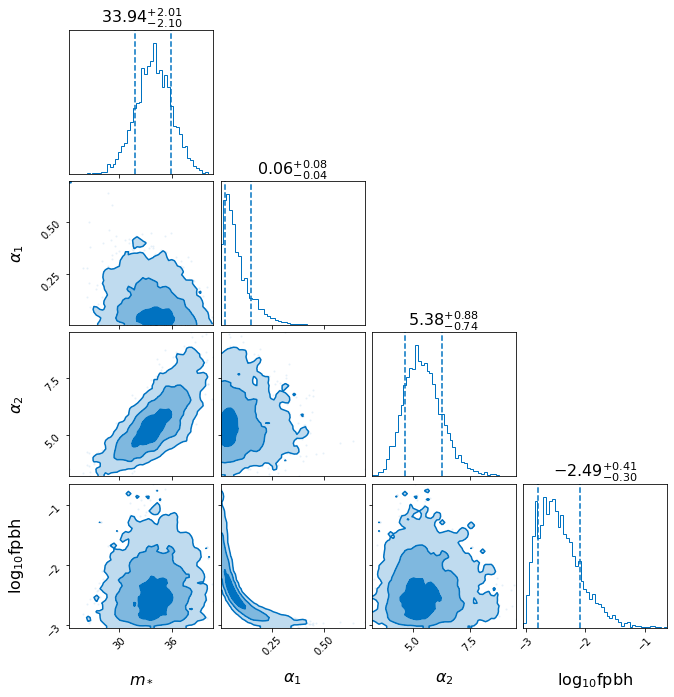

In [5]:
analysis = hierarchical_analysis2(posterior_dict, injections, fixed_cosmo=True)

# Run bilby.  Here we will be using emcee
result = analysis.run_bilby(population_model, cosmology_model, prior_dict, nlive=500, nact=2, walks=20,
                            outdir=outdir, label='dynesty', npool=npool, parallel=2000, check_point_delta_t=60)
result.plot_corner()
